In [1]:
# Install required libraries
!pip install -U -q matplotlib seaborn scikit-learn

# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 71.2 MB/s eta 0:00:00


In [2]:
# Load Data
df = pd.read_csv('creditcard.csv')

# Handle Missing Values
print("Missing values before preprocessing:")
print(df.isnull().sum())

df = df.fillna(method='ffill')  # Forward fill to handle missing values

print("\nMissing values after preprocessing:")
print(df.isnull().sum())

# Splitting Data
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Missing values before preprocessing:
Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Missing values after preprocessing:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<ipython-input-2-25c961503e27>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill to handle missing values


In [3]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, title='Receiver Operating Characteristic (ROC) Curve'):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()


Logistic Regression


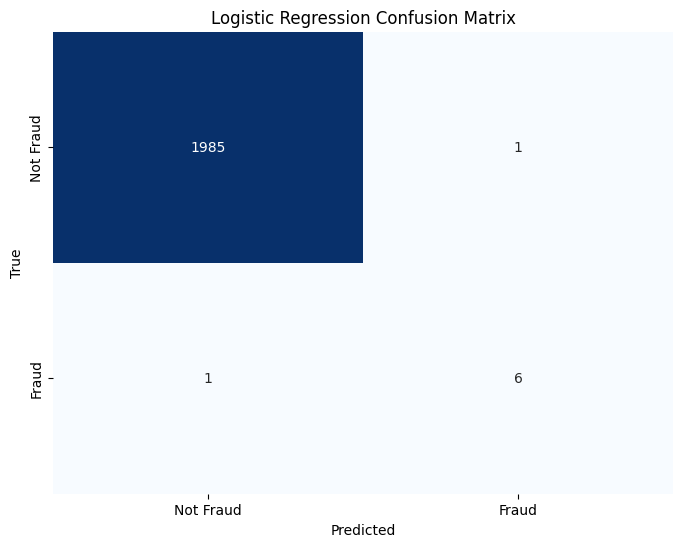

Logistic Regression Accuracy: 99.89964877069744


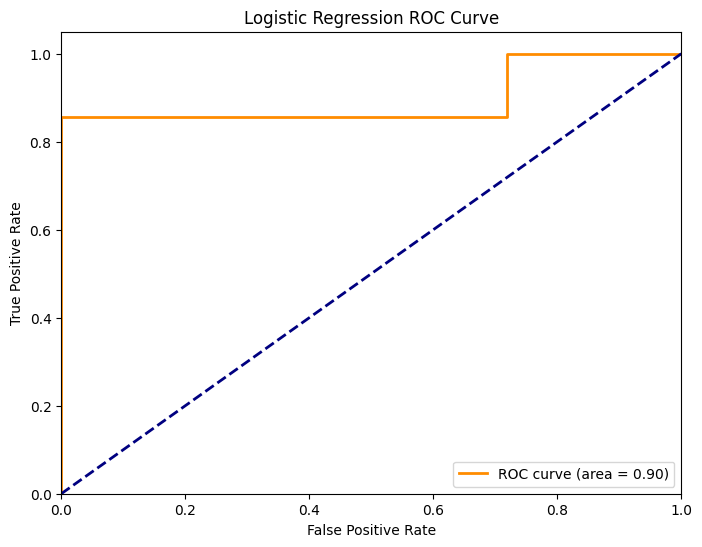

In [4]:
# Logistic Regression
print("Logistic Regression")
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Confusion Matrix and Accuracy
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 'Logistic Regression Confusion Matrix')
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred) * 100)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, 'Logistic Regression ROC Curve')


Decision Tree Classifier


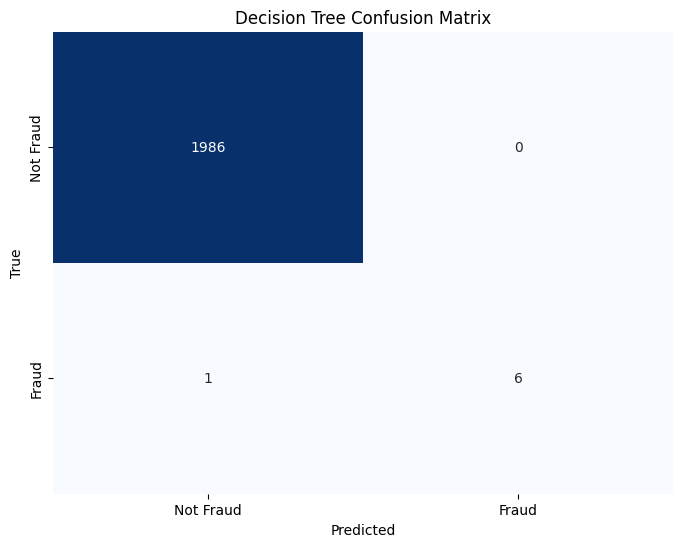

Decision Tree Accuracy: 99.94982438534872


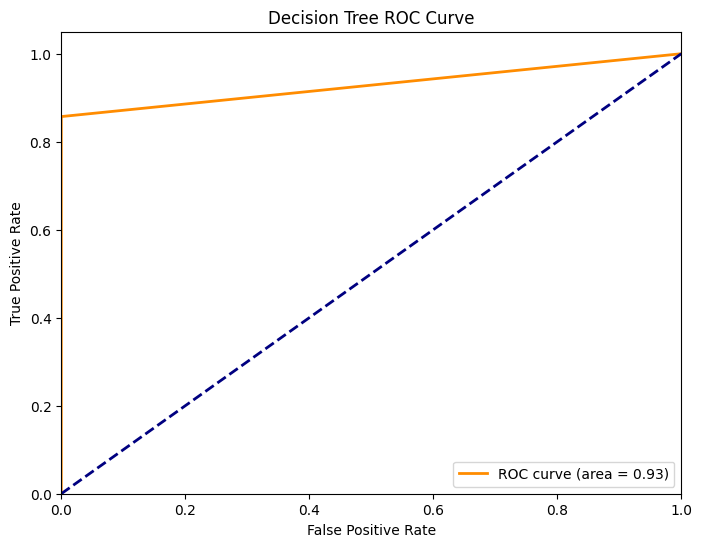

In [5]:
# Decision Tree Classifier
print("Decision Tree Classifier")
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_predict_clf = clf.predict(X_test)

# Confusion Matrix and Accuracy
cm = confusion_matrix(y_test, y_predict_clf)
plot_confusion_matrix(cm, 'Decision Tree Confusion Matrix')
print("Decision Tree Accuracy:", accuracy_score(y_test, y_predict_clf) * 100)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, 'Decision Tree ROC Curve')


Random Forest Classifier


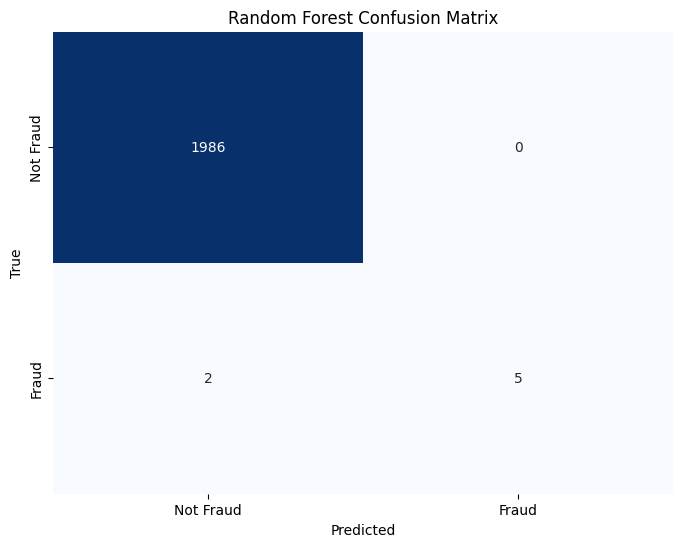

Random Forest Accuracy: 99.89964877069744


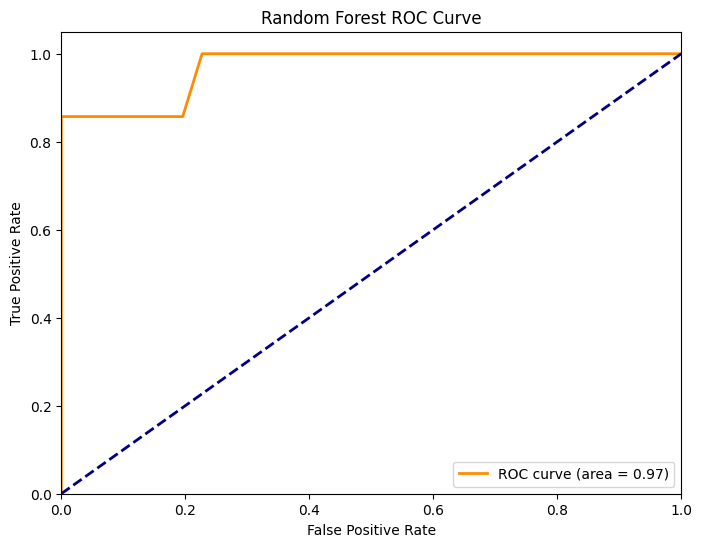

In [6]:
# Random Forest Classifier
print("Random Forest Classifier")
rf_clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)
rf_clf.fit(X_train, y_train)
y_randomforest_predict = rf_clf.predict(X_test)

# Confusion Matrix and Accuracy
cm = confusion_matrix(y_test, y_randomforest_predict)
plot_confusion_matrix(cm, 'Random Forest Confusion Matrix')
print("Random Forest Accuracy:", accuracy_score(y_test, y_randomforest_predict) * 100)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, 'Random Forest ROC Curve')


Naive Bayes Classifier


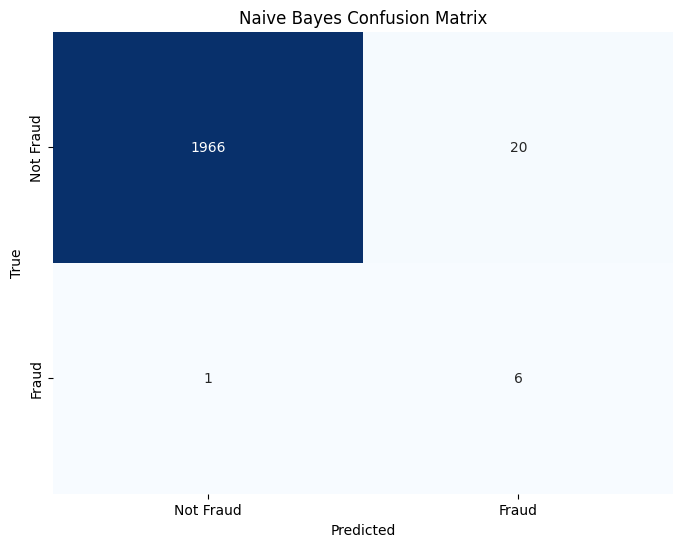

Naive Bayes Accuracy: 98.94631209232313


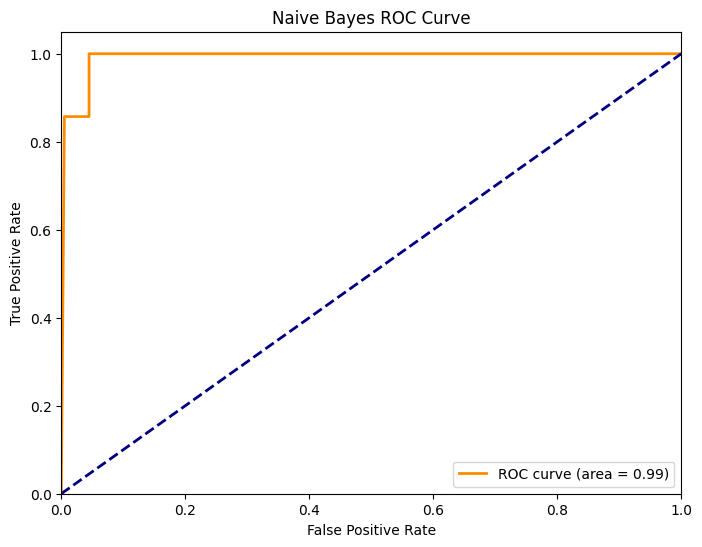

In [7]:
# Naive Bayes Classifier
print("Naive Bayes Classifier")
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb_predict = gnb.predict(X_test)

# Confusion Matrix and Accuracy
cm = confusion_matrix(y_test, y_gnb_predict)
plot_confusion_matrix(cm, 'Naive Bayes Confusion Matrix')
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_gnb_predict) * 100)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, 'Naive Bayes ROC Curve')


SVM Classifier with linear kernel


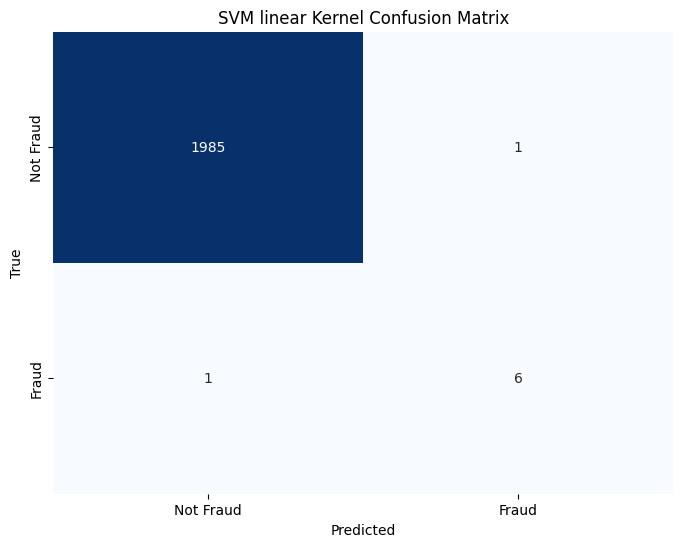

SVM linear Kernel Accuracy: 99.89964877069744


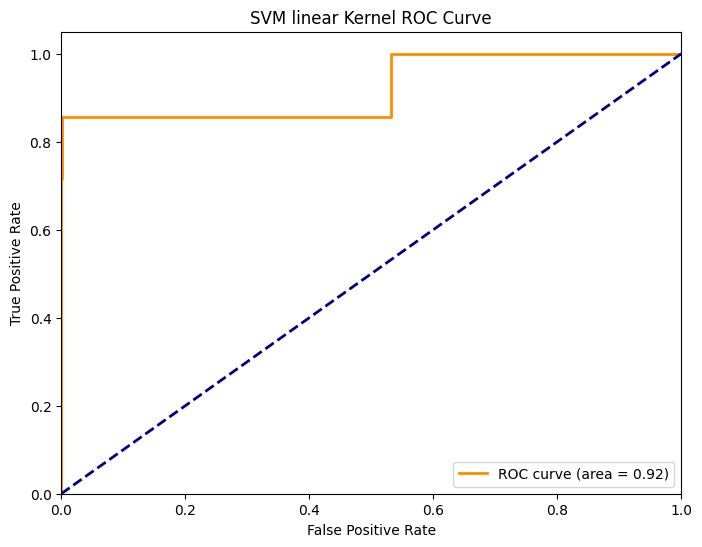

SVM Classifier with poly kernel


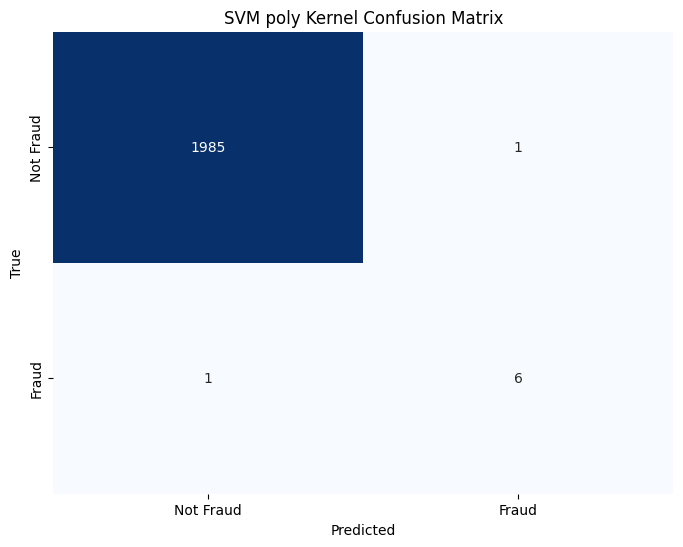

SVM poly Kernel Accuracy: 99.89964877069744


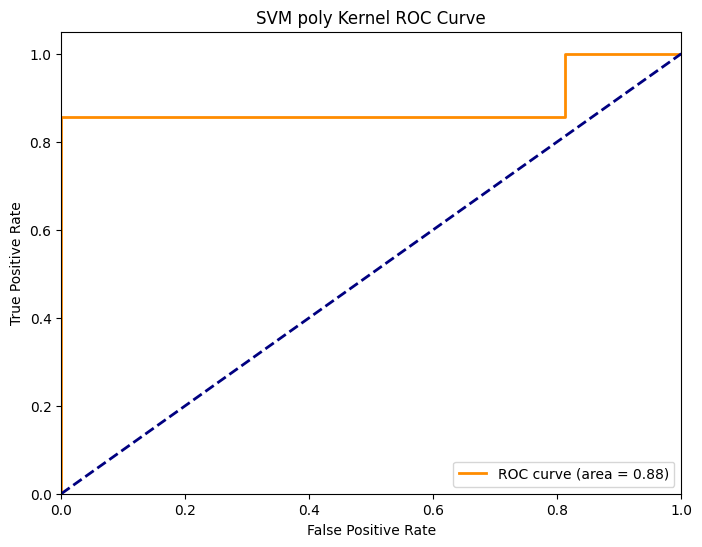

SVM Classifier with rbf kernel


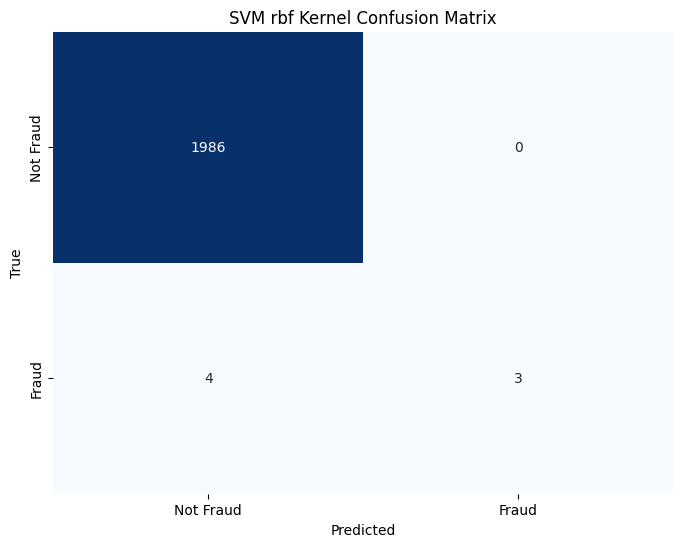

SVM rbf Kernel Accuracy: 99.79929754139488


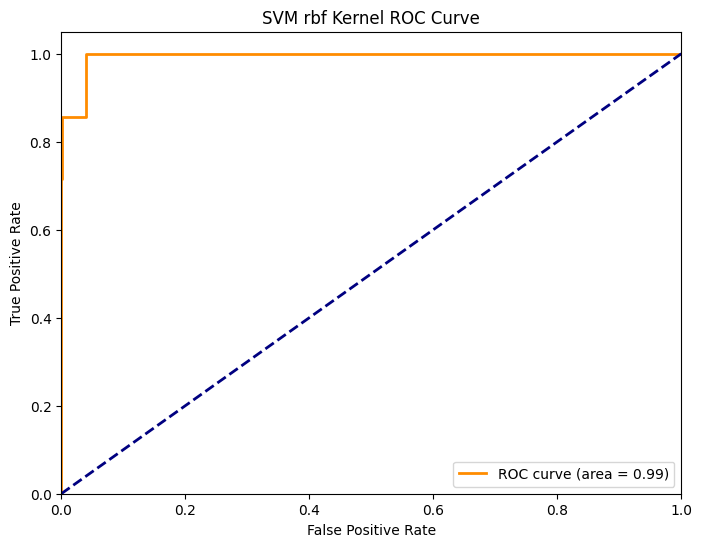

SVM Classifier with sigmoid kernel


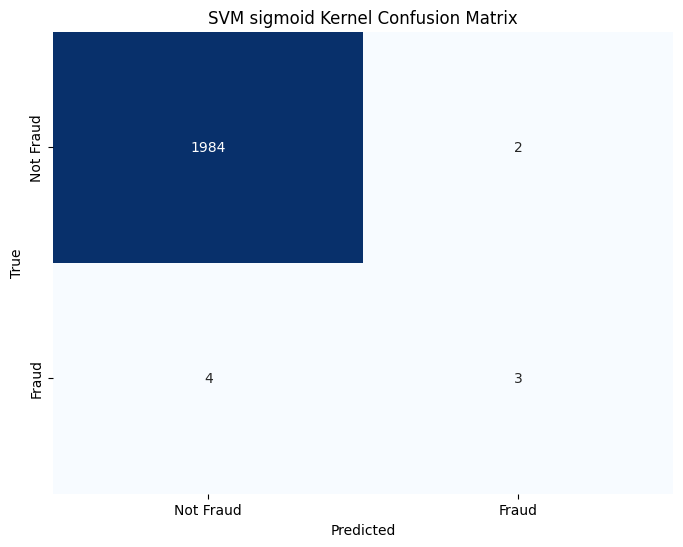

SVM sigmoid Kernel Accuracy: 99.69894631209232


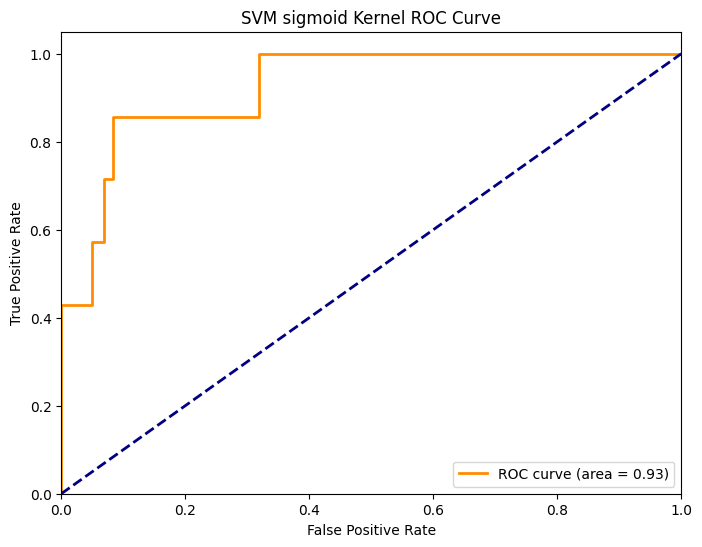

In [8]:
# Support Vector Machine Classifiers
svm_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in svm_kernels:
    print(f"SVM Classifier with {kernel} kernel")
    clf = svm.SVC(kernel=kernel, probability=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Confusion Matrix and Accuracy
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, f'SVM {kernel} Kernel Confusion Matrix')
    print(f"SVM {kernel} Kernel Accuracy:", accuracy_score(y_test, y_pred) * 100)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plot_roc_curve(fpr, tpr, roc_auc, f'SVM {kernel} Kernel ROC Curve')


K-Nearest Neighbors Classifier


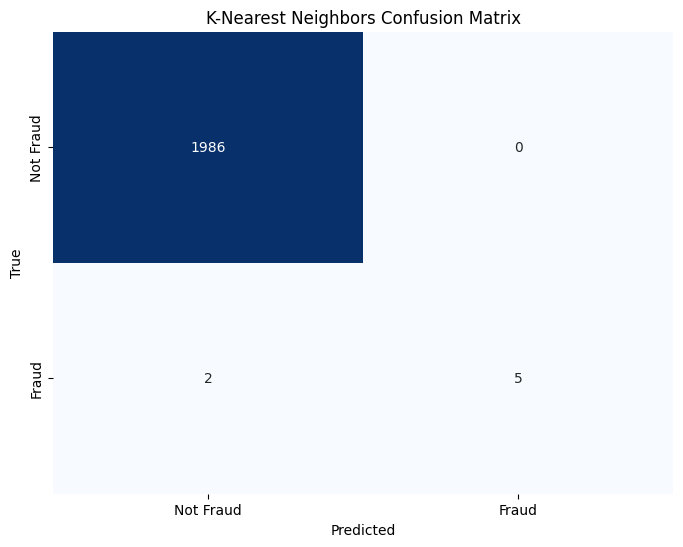

K-Nearest Neighbors Accuracy: 99.89964877069744


In [10]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier # import KNeighborsClassifier
print("K-Nearest Neighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_knn_predict = knn.predict(X_test)

# Confusion Matrix and Accuracy
cm = confusion_matrix(y_test, y_knn_predict)
plot_confusion_matrix(cm, 'K-Nearest Neighbors Confusion Matrix')
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_knn_predict) * 100)

Voting Classifier (Hard)


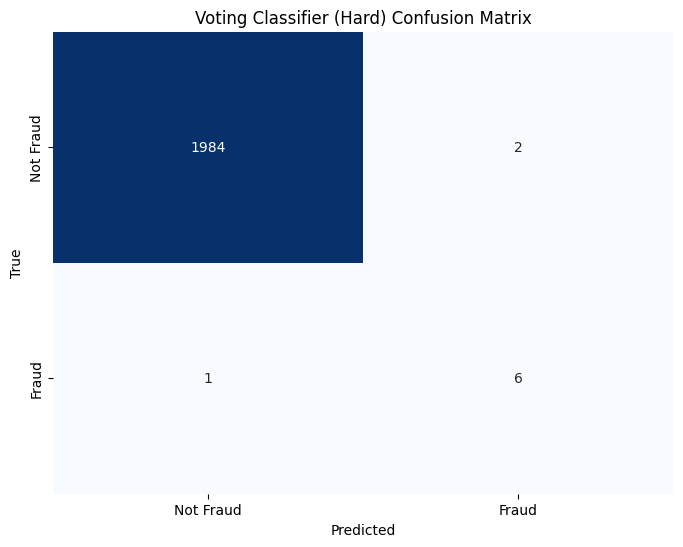

Voting Classifier (Hard) Accuracy: 99.84947315604616
Voting Classifier (Soft)


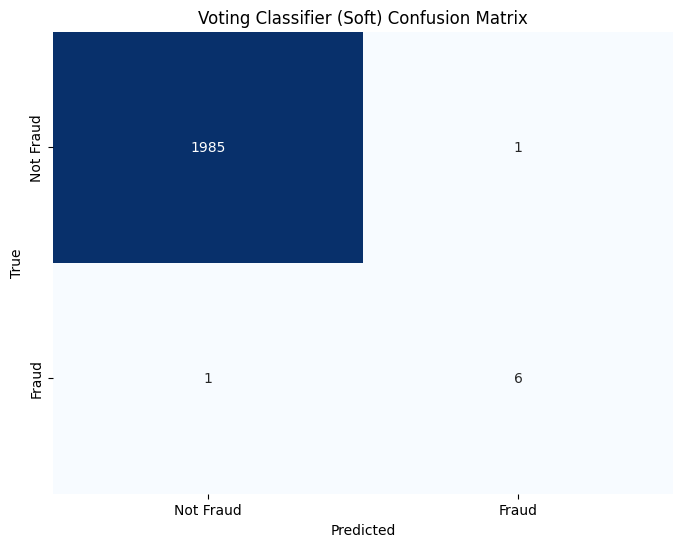

Voting Classifier (Soft) Accuracy: 99.89964877069744


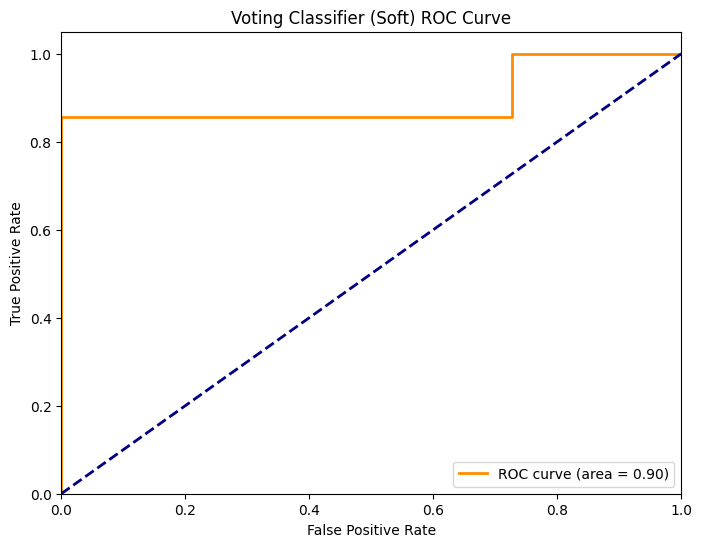

In [12]:
# Voting Classifier (Hard)
print("Voting Classifier (Hard)")
clf1 = GaussianNB()
clf2 = DecisionTreeClassifier()
clf3 = LogisticRegression(max_iter=10000)

voting_clf_hard = VotingClassifier(estimators=[('Gaussian', clf1), ('DecisionTree', clf2), ('Logistic', clf3)], voting='hard')
voting_clf_hard.fit(X_train, y_train)
predictions = voting_clf_hard.predict(X_test)

# Confusion Matrix and Accuracy
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'Voting Classifier (Hard) Confusion Matrix')
print("Voting Classifier (Hard) Accuracy:", accuracy_score(y_test, predictions) * 100)

# ROC Curve is not applicable for hard voting as it does not produce probabilities
# fpr, tpr, _ = roc_curve(y_test, voting_clf_hard.predict_proba(X_test)[:,1])
# roc_auc = auc(fpr, tpr)
# plot_roc_curve(fpr, tpr, roc_auc, 'Voting Classifier (Hard) ROC Curve')

# Voting Classifier (Soft)
print("Voting Classifier (Soft)")
voting_clf_soft = VotingClassifier(estimators=[('Gaussian', clf1), ('DecisionTree', clf2), ('Logistic', clf3)], voting='soft')
voting_clf_soft.fit(X_train, y_train)
predictions = voting_clf_soft.predict(X_test)

# Confusion Matrix and Accuracy
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, 'Voting Classifier (Soft) Confusion Matrix')
print("Voting Classifier (Soft) Accuracy:", accuracy_score(y_test, predictions) * 100)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, voting_clf_soft.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, 'Voting Classifier (Soft) ROC Curve')